In [21]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager # webdrv-manager 패키지 다운로드
from selenium.webdriver.common.keys import Keys
# from bs4 import BeautifulSoup

import json
import os
# import argparse

import requests
import urllib
import urllib3
from urllib3.exceptions import InsecureRequestWarning

import datetime
import time
import sys
import pandas as pd
import re
from tqdm import tqdm_notebook

In [22]:
urllib3.disable_warnings(InsecureRequestWarning)

In [23]:
def download_google_staticimages(searchurl):

    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')

    try:
        browser = driver
    except Exception as e:
        print(f'No found chromedriver in this environment.')
        print(f'Install on your machine. exception: {e}')
        sys.exit()

    browser.set_window_size(1024, 720)
    browser.get(searchurl)
    time.sleep(1)

    print(f'Getting you a lot of images. This may take a few moments...')

    element = browser.find_element_by_tag_name('body')

    # Scroll down
    for _ in range(30):
        element.send_keys(Keys.END)
        time.sleep(0.5)
    scroll = 0
    while True:
        try:
            browser.find_element_by_xpath('//input[@value="결과 더보기"]').click()
            # Scroll down 2
            for _ in range(30):
                element.send_keys(Keys.END)
                time.sleep(0.3)
        except:
            if browser.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[4]/div[2]/div[1]/div').text == '더 이상 표시할 콘텐츠가 없습니다.':
                break
            else:
                # Scroll down 3
                for _ in range(10):
                    element.send_keys(Keys.END)
                    time.sleep(0.3)
                    scroll+=1
                    if scroll>=50:
                        break
                    if len(driver.find_elements_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/div')) >= 800:
                        break
                    # if len(browser.find_elements_by_tag_name('img')) >= 800:
                    #     break

    # images = browser.find_elements_by_tag_name('img')
    images = driver.find_elements_by_xpath('/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/div')
    i = 0
    urls = []
    print('click images')
    for image in tqdm_notebook(images):
        try:
            image.click()
            # time.sleep(0.1)
            url = browser.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img').get_attribute('src')
            urls.append(url)
            i+=1
        except:
            pass
        if i >= 2000:
            break

    count = 0
    print('download images')
    for url in tqdm_notebook(urls):
        try:
            res = requests.get(url, verify = False, stream = True, timeout = 10)
            rawdata = res.raw.read()
            direct = f'C:/Users/YONGHEON LEE/Downloads/google_mask_crawling/test/'
            with open(os.path.join(direct, str(count) + '.jpg'), 'wb') as f:
                f.write(rawdata)
                count += 1
                time.sleep(0.3)
        except Exception as e:
            print('Failed to write rawdata.')
            print(e)
    browser.close()

In [24]:
# Main block
def main():
    t0 = time.time()
    searchword = 'wear mask people'
    searchurl = 'https://www.google.com/search?q=' + searchword + '&tbm=isch'
    download_google_staticimages(searchurl)
    t1 = time.time()

    total_time = t1 - t0
    print(f'\n')
    print(f'Total time is {str(total_time)} seconds.')

[WDM] - Current google-chrome version is 86.0.4240
INFO:WDM:Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
INFO:WDM:Get LATEST driver version for 86.0.4240
[WDM] - Driver [C:\Users\YONGHEON LEE\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe] found in cache


INFO:WDM:Driver [C:\Users\YONGHEON LEE\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe] found in cache


Getting you a lot of images. This may take a few moments...
click images


<ipython-input-23-274e5138f339>:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image in tqdm_notebook(images):



download images


<ipython-input-23-274e5138f339>:68: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for url in tqdm_notebook(urls):


Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to write rawdata.
No connection adapters were found for ''
Failed to 
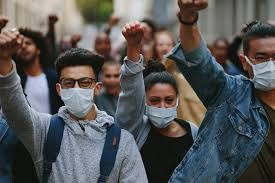
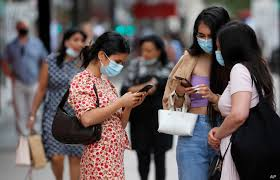
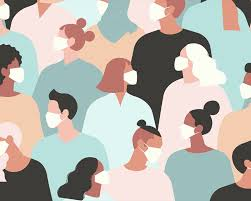
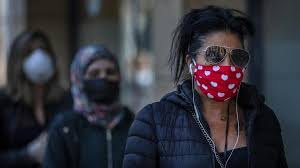
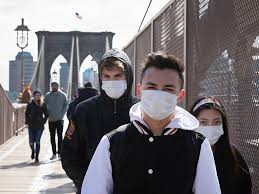
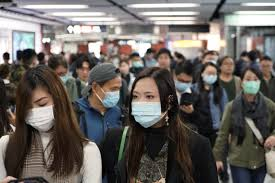
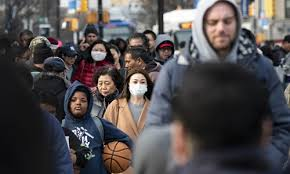
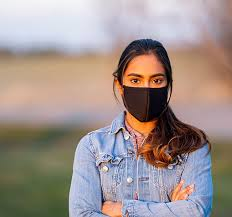
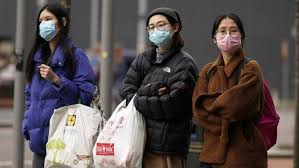
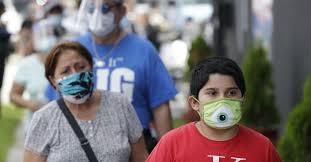
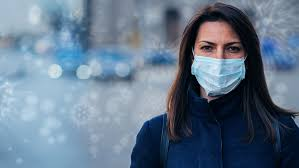
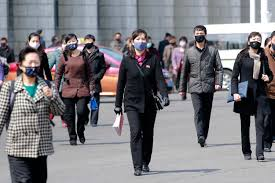
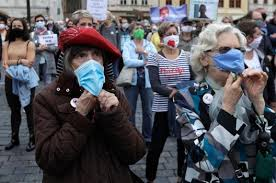
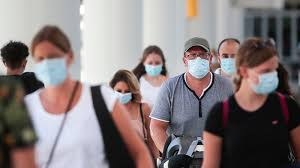
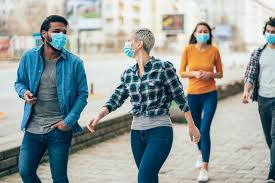
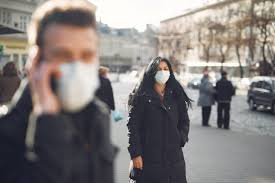
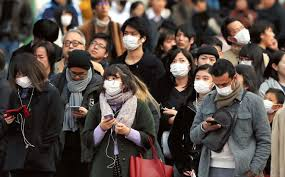
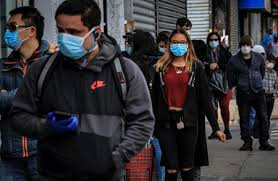
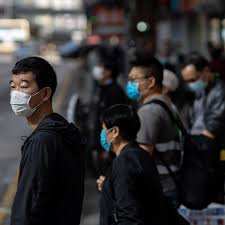
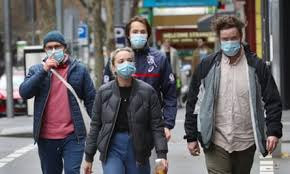

In [25]:
driver = webdriver.Chrome(ChromeDriverManager().install())
if __name__ == '__main__':
    main()

In [ ]:
def resize_pad_img(filedir, size):
    img = cv2.imread(filedir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if(img.shape[1] > img.shape[0]):
        percent = size / img.shape[1]
    else:
        percent = size / img.shape[0]
    
    img = cv2.resize(img, dsize = (0, 0), fx = percent, fy = percent, interpolation = cv2.INTER_LINEAR)
    y, x, h, w = (0, 0, img.shape[0], img.shape[1])
    
    w_x = (size - (w - x)) / 2
    h_y = (size - (h - y)) / 2
    
    if(w_x < 0):
        w_x = 0
    elif(h_y < 0):
        h_y = 0
    
    M = np.float32([[1, 0, w_x], [0, 1, h_y]])
    img_re = cv2.warpAffine(img, M, (size, size))
    cv2.imshow("img_re", img_re)
    cv2.waitKey(0)